## Исследование колебаний root во время ходьбы

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import plotly.plotly as py
import plotly.graph_objs as go

Read in all data

In [2]:
data_path = '../output/parsed_data/'
flnms = os.listdir(data_path)

df = pd.DataFrame()

for fl in flnms:
    d = pd.read_csv(data_path + fl)
    d = d[d['frame'] > 10]
    df = pd.concat([df, d])

In [3]:
df.shape

(25341, 476)

Интересна ось 0 (по ширине шага)

In [4]:
df.columns

Index(['root_coord_0', 'root_coord_1', 'root_coord_2', 'root_norm_coord_0',
       'root_norm_coord_1', 'root_norm_coord_2', 'root_angle_0',
       'root_angle_1', 'root_angle_2', 'root_norm_angle_0',
       ...
       'amc_path', 'person', 'heel_strike_l', 'toe_off_l', 'phases_l',
       'heel_strike_r', 'toe_off_r', 'phases_r', 'support', 'support_cat'],
      dtype='object', length=476)

In [37]:
cols = [
    'root_coord_1',
    'root_norm_coord_1',
    'frame',
    'amc_path',
    'phases_l',
    'phases_r',
    'support'
]
cols_sec = [
    'ltibia_norm_coord_0',
    'rtibia_norm_coord_0',
    'frame',
    'amc_path',
    'phases_l',
    'phases_r',
    'support'
]

In [38]:
df_data = df[cols]
df_data_sec = df[cols_sec]

In [40]:
def dm_to_sm(a):
    b = a / 0.45 * 2.54
    return b

## перевод в см
df_data.loc[:, 'root_coord_1'] = df_data.loc[:, 'root_coord_1'].apply(dm_to_sm)

## перевод в см
df_data_sec.loc[:, 'ltibia_norm_coord_0'] = df_data_sec.loc[:, 'ltibia_norm_coord_0'].apply(dm_to_sm)
df_data_sec.loc[:, 'rtibia_norm_coord_0'] = df_data_sec.loc[:, 'rtibia_norm_coord_0'].apply(dm_to_sm)

In [41]:
# df_data.root_coord_1.hist()

In [42]:
df_data_sec.head()

,ltibia_norm_coord_0,rtibia_norm_coord_0,frame,amc_path,phases_l,phases_r,support
11,-2.391325,2.224104,11,02_01.amc,heel_strike,toe_off,ds
12,-2.287779,1.960920,12,02_01.amc,heel_strike,toe_off,ds
13,-2.190264,1.729526,13,02_01.amc,NaN,toe_off,ds
14,-2.100436,1.495333,14,02_01.amc,NaN,toe_off,ds
15,-2.078251,1.175375,15,02_01.amc,NaN,toe_off,ds


In [20]:
ph_amc_agg = df_data.groupby(['amc_path']).agg({'root_coord_1': ['min', 'max']})
ph_amc_agg.columns = ['min_height', 'max_height']
ph_amc_agg.reset_index(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



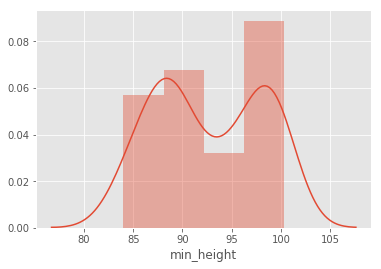

In [23]:
sns.distplot(ph_amc_agg['min_height'])

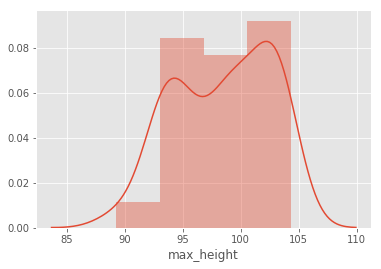

In [24]:
sns.distplot(ph_amc_agg['max_height'])

In [27]:
ph_amc_agg.head()

,amc_path,min_height,max_height,diff
0,02_01.amc,93.260333,100.455871,7.195538
1,02_02.amc,89.622489,99.134507,9.512018
2,05_01.amc,92.018556,96.310591,4.292036
3,06_01.amc,99.442129,104.349973,4.907844
4,07_01.amc,90.203867,98.812773,8.608907


In [26]:
ph_amc_agg['diff'] = ph_amc_agg['max_height'] - ph_amc_agg['min_height']


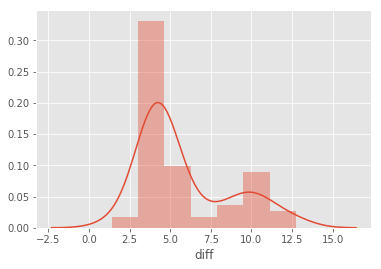

In [28]:
sns.distplot(ph_amc_agg['diff'])

In [30]:
d = df_data[df_data['amc_path'] == '02_01.amc']

In [31]:
d.head()

,root_coord_1,frame,amc_path,phases_l,phases_r,support
11,93.260333,11,02_01.amc,heel_strike,toe_off,ds
12,93.320729,12,02_01.amc,heel_strike,toe_off,ds
13,93.363627,13,02_01.amc,NaN,toe_off,ds
14,93.352338,14,02_01.amc,NaN,toe_off,ds
15,93.311698,15,02_01.amc,NaN,toe_off,ds


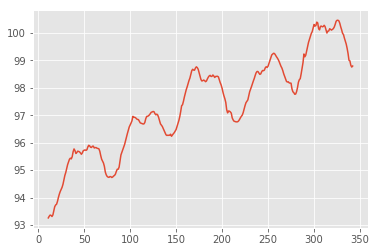

In [32]:
plt.plot(d['frame'], d['root_coord_1'])

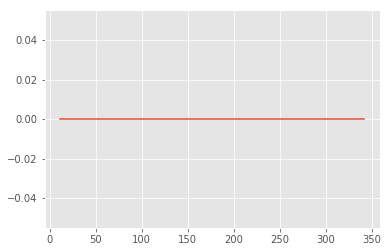

In [36]:
plt.plot(df.loc[df['amc_path'] == '02_01.amc', 'frame'], df.loc[df['amc_path'] == '02_01.amc', 'root_norm_coord_1'])